In [22]:
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.preprocessing as preprocessing
import warnings; warnings.filterwarnings('ignore')

In [4]:
%matplotlib inline

In [55]:
%store -r train_df
%store -r lasso_top10
%store -r lm_df

In [40]:
%run ../src/viz_helper.py

In [105]:
lasso_top10_df = train_df[lasso_top10]
is_numerical = lasso_top10_df.dtypes.isin([np.dtype('float64'), np.dtype('int64')])
num_feats = lasso_top10_df.dtypes.index[is_numerical]

In [107]:
def standard_scale(dataframe):
    array_ = preprocessing.scale(dataframe.values)
    if isinstance(dataframe, pd.DataFrame):
        scaled_df = pd.DataFrame(array_, 
                                 index = dataframe.index,
                                 columns = dataframe.columns)
    elif isinstance(dataframe, pd.Series):
        scaled_df = pd.Series(array_,
                              index = dataframe.index)
    
    return scaled_df

st_scaled_df = standard_scale(lasso_top10_df[num_feats])

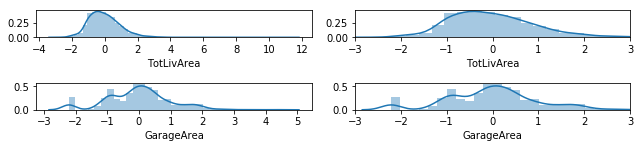

In [108]:
fig = plt.figure(figsize=(9,40))
for i, col in enumerate(st_scaled_df):
    if i < 20:
        fig.add_subplot(40,2,2*i + 1)
        sns.distplot(st_scaled_df[col])
        fig.add_subplot(40,2,2*i + 2)
        sns.distplot(st_scaled_df[col])
        plt.xlim(-3,3)
        plt.tight_layout()

In [109]:
pca = PCA(2)
pca.fit(st_scaled_df[num_feats])

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

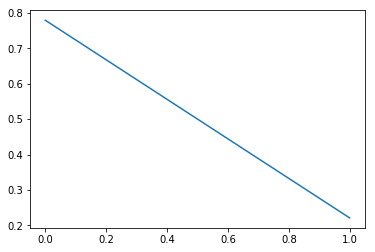

In [110]:
#Scree (not ScreeN) plot
plt.plot(pca.explained_variance_ratio_)

### Principal Components Analysis
Only two of the ten most important features are numerical, so PCA analysis can not really tell us much. 
It is not completely useless though. Using PCA analysis, we can see that there is a positive correlation between `TotLivArea` and `GarageArea` because the explained variance of both increasing together is 78% more than the explained variance of the second dimension which is 22%.

In [114]:
pca = PCA(2)
pca.fit(st_scaled_df)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

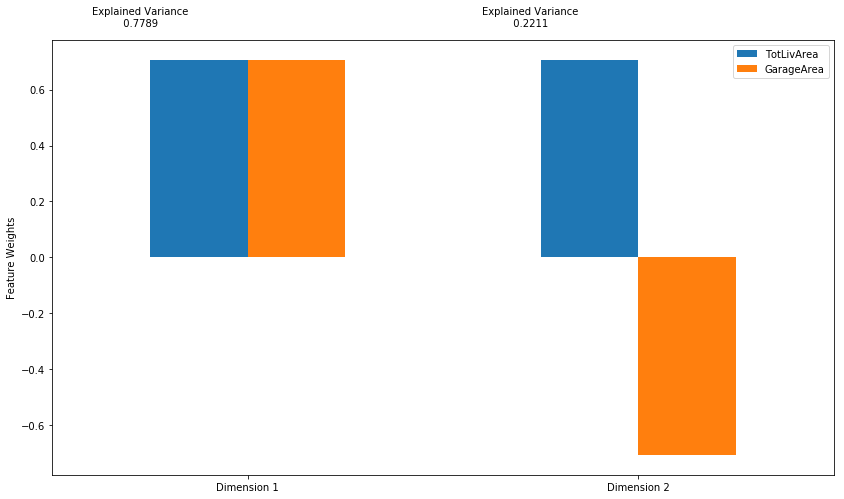

In [115]:
pca_df = pca_results(st_scaled_df, pca)

In [116]:
pca_df

,Explained Variance,TotLivArea,GarageArea
Dimension 1,0.7789,0.7071,0.7071
Dimension 2,0.2211,0.7071,-0.7071
